In [ ]:
!pip install plotly==4.9.0

     |████████████████████████████████| 12.9MB 241kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
# !pip show tensorflow

In [ ]:
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from IPython.display import display
from PIL import Image
from plotly.subplots import make_subplots
# import plotly.graph_objects as go
from plotly import __version__
%matplotlib inline
from plotly.offline import iplot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
pd.options.plotting.backend = "plotly"

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [ ]:
!ls /content/gdrive

'My Drive'


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls /content/gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
'My Drive'


In [ ]:
# !find / -name 'image_reading-V3.ipynb' -print

In [ ]:
# path = os.path.expanduser('~/project/data/input')
path_train = "/content/gdrive/My Drive/project/data/input/train"
path_test = "/content/gdrive/My Drive/project/data/input/test"
# for expression in os.listdir(path_train):
#   print(expression)

In [ ]:
def plot_train_images(plt):
    img_size = 48
    plt.figure(0, figsize=(12,20))
    ctr = 0
    for expression in os.listdir(path_train):
        if not expression.startswith('.'):
            for i in range(1,7):
                ctr += 1
                plt.subplot(7,6,ctr)
                img = image.load_img(path_train +"/"+ expression + "/" +os.listdir(path_train +"/"+ expression)[i], target_size=(img_size, img_size))
                plt.imshow(img, cmap="gray")
    #             file = "data/input/test/" + expression + "/" +os.listdir("data/input/test/" + expression)[i]
    #             print(file)
    #             pict = Image.open(file)
    #             width, height = pict.size
    #             print(width, height)
                plt.title(expression)

    plt.tight_layout()
    return plt

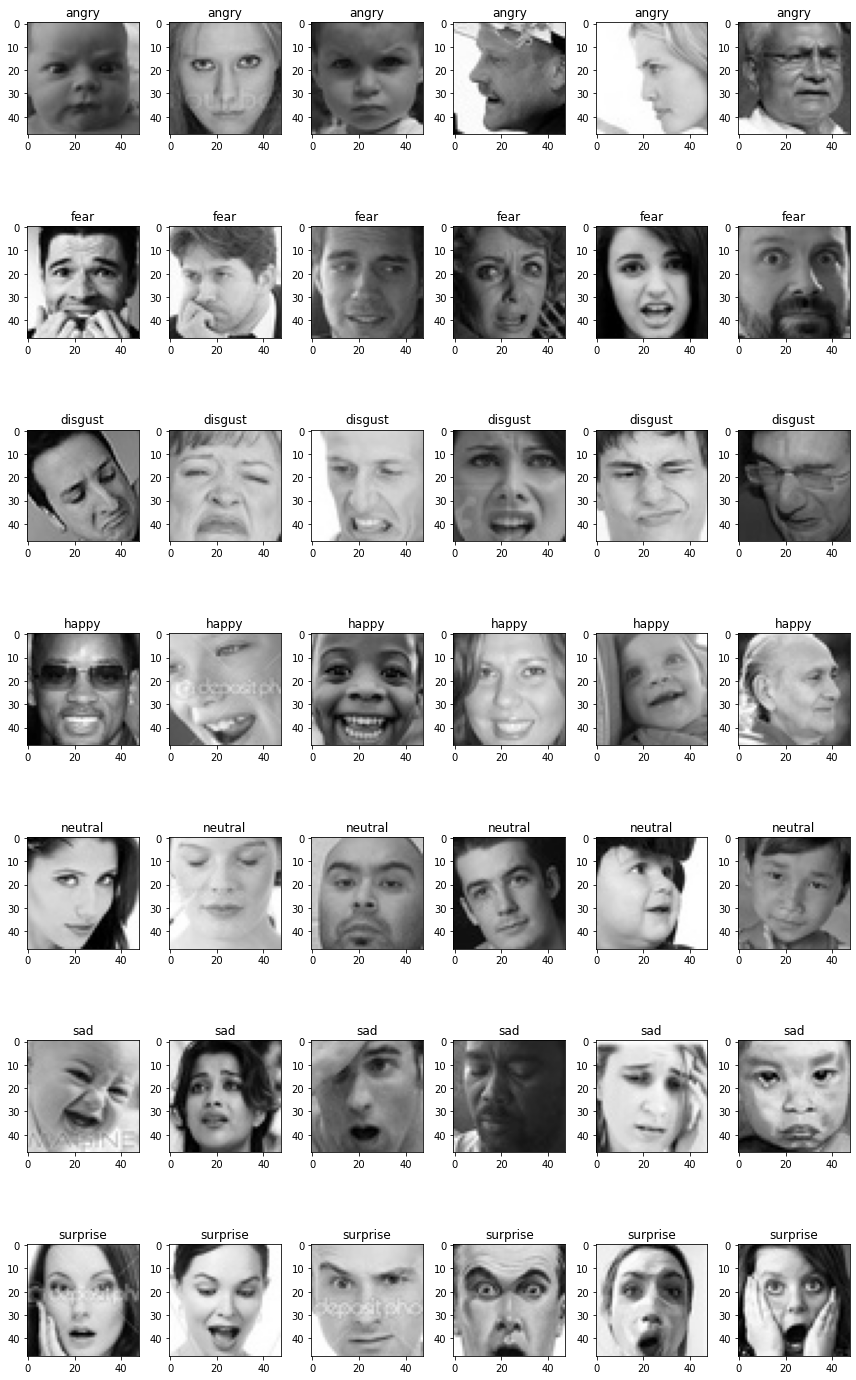

In [ ]:
# image size 48x48
plot_train_images(plt).show()

In [ ]:
df1 = {}
df2 = {}
df = []
for expression in os.listdir(path_train):
    if not expression.startswith('.'):
        folder = path_train+"/" + expression
        df1[expression] = len(os.listdir(folder))
df1['category'] = 'Train Images'
for expression in os.listdir(path_test):
    if not expression.startswith('.'):
        folder = path_test+"/" + expression
        df2[expression] = len(os.listdir(folder))
df2['category'] = 'Test Images'
df.append(df1)
df.append(df2)
data = pd.DataFrame(df, index=[0,1])
data2 = data.set_index('category').T

In [ ]:
fig = data2.transpose().plot.bar(labels=dict(index="Expression", value="Counts"))
fig.update_layout(title_text='Facial Expressions')
fig.show()

In [ ]:
img_size = 48
batch_size = 64
# X_train = image.ImageDataGenerator(rescale=1.0/255.0, horizontal_flip=True)
datagen1 = image.ImageDataGenerator(rescale=1.0/255.0, rotation_range=40, horizontal_flip=True)
datagen2 = image.ImageDataGenerator(rescale=1.0/255.0)
#classes = ['angry','disgust','fear','happy','neutral','sad','surprise']
#objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

In [ ]:
train_images = datagen1.flow_from_directory(path_train, target_size = (img_size, img_size),
                                            color_mode = 'grayscale',
                                            classes = classes,
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            shuffle = True )

Found 28709 images belonging to 7 classes.


In [ ]:
test_images = datagen2.flow_from_directory(path_test, target_size = (img_size, img_size),
                                           color_mode = 'grayscale',
                                           classes = classes,
                                           batch_size = batch_size,
                                           class_mode = 'categorical',
                                           shuffle = True )

Found 7178 images belonging to 7 classes.


In [ ]:
train_images[0]

## CNN Model

In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional 1st layer
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())

# convolutional 2nd layer
model.add(Conv2D(128, kernel_size=(3,3), use_bias=False, strides=(1,1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# convolutional 3rd layer
model.add(Conv2D(512, kernel_size=(3,3), use_bias=False, strides=(1,1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# # convolutional 4th layer
# model.add(Conv2D(512, kernel_size=(3,3), use_bias=False, strides=(1,1), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

In [ ]:
# hidden layer
model.add(Dense(500, use_bias=False, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(250, use_bias=False, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(250, use_bias=False, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# output layer
model.add(Dense(7, activation='softmax'))

In [ ]:
# We can summarize our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 128)       73728     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 128)       512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 512)       5

In [ ]:
# compiling the sequential model
# model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam', **kwargs)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, name='Adam'))

In [ ]:
steps_per_epoch = train_images.n // train_images.batch_size
validation_steps = test_images.n // test_images.batch_size
print(steps_per_epoch, validation_steps)

448 112


In [ ]:
# train_labels = train_images.classes
# n_classes = len(train_images.class_indices)
# train_labels = to_categorical(train_labels, n_classes)
# test_labels = test_images.classes
# test_labels = to_categorical(test_labels, n_classes)
# print(train_labels.shape, test_labels.shape)

In [ ]:
epochs = 54
model_weights_path = "/content/gdrive/My Drive/project/models/facial_weights_ffd_"+str(epochs)+".h5"
checkpoint_path = "/content/gdrive/My Drive/project/models/facialmodel_ffd_"+str(epochs)+".h5"
model_path = "/content/gdrive/My Drive/project/models/facial_expressions_cnn_ffd_"+str(epochs)+".h5"
json_path = "/content/gdrive/My Drive/project/models/facial_expressions_cnn_ffd_"+str(epochs)+".json"
print("Model Weights:", model_weights_path)
print("Model Checkpoint:", checkpoint_path)
print("Model Path:", model_path)
print("Json Path:", json_path)

Model Weights: /content/gdrive/My Drive/project/models/facial_weights_ffd_54.h5
Model Checkpoint: /content/gdrive/My Drive/project/models/facialmodel_ffd_54.h5
Model Path: /content/gdrive/My Drive/project/models/facial_expressions_cnn_ffd_54.h5
Json Path: /content/gdrive/My Drive/project/models/facial_expressions_cnn_ffd_54.json


In [ ]:
checkpoint = ModelCheckpoint(model_weights_path, monitor='val_accuracy',
                            save_weights_only = True,
                            mode = 'max',
                            verbose = 1)
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=3, verbose=1)
checkpointer = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True)
callbacks = [checkpoint, lr_reducer, checkpointer]

In [ ]:
print(epochs)

54


In [ ]:
# training the model for 10 epochs
# history = model.fit(train_images, train_labels,
#                     steps_per_epoch=steps_per_epoch, epochs=15, 
#                     validation_data=(test_images, test_labels),
#                     validation_steps=validation_steps, callbacks=callbacks)
history = model.fit(train_images, steps_per_epoch=steps_per_epoch,
                    epochs=epochs, validation_data=test_images,
                    validation_steps=validation_steps, callbacks=callbacks)

# print(model_path)
# Save the model
model.save(model_path)
# Save json format
model_json = model.to_json()
with open(json_path, "w") as f:
    f.write(model_json)

# Evaluate the model using the training data 
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

## Visualising the training over time

In [ ]:
epochs = epochs
metric = "loss"
metric2 = "accuracy"
train_m1 = history.history[metric]
train_m2 = history.history[metric2]
val_m1 = history.history[f'val_{metric}']
val_m2 = history.history[f'val_{metric2}']

In [ ]:
fig_model = make_subplots(1,
                          2,
                          subplot_titles=(f"{metric.capitalize()} over Time",
                                          f"{metric2.capitalize()} over Time"))
fig_model.add_trace(go.Scatter(x=np.arange(epochs),
                               y=train_m1,
                               mode="lines+markers",
                               name=f"Training {metric.capitalize()}"),
                    row=1,
                    col=1)
fig_model.add_trace(go.Scatter(x=np.arange(epochs),
                               y=val_m1,
                               mode="lines+markers",
                               name=f"Validation {metric.capitalize()}"),
                    row=1,
                    col=1)
fig_model.add_trace(go.Scatter(x=np.arange(epochs),
                               y=train_m2,
                               mode="lines+markers",
                               name=f"Training {metric2.capitalize()}"),
                    row=1,
                    col=2)
fig_model.add_trace(go.Scatter(x=np.arange(epochs),
                               y=val_m2,
                               mode="lines+markers",
                               name=f"Validation {metric2.capitalize()}"),
                    row=1,
                    col=2)
fig_model.show()